In [3]:
!pip install pgmpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 66.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 46.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 73.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 59.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 48.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 90.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12

In [4]:
import pandas as pd
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.inference import VariableElimination

In [5]:
# Load dataset
data = pd.read_csv("heartdisease.csv")
heart_disease = pd.DataFrame(data)

In [ ]:
# Display the dataset
print("Dataset:")
print(heart_disease)

Dataset:
    age  Gender  Family  diet  Lifestyle  cholestrol  heartdisease
0     0       0       1     1          3           0             1
1     0       1       1     1          3           0             1
2     1       0       0     0          2           1             1
3     4       0       1     1          3           2             0
4     3       1       1     0          0           2             0
5     2       0       1     1          1           0             1
6     4       0       1     0          2           0             1
7     0       0       1     1          3           0             1
8     3       1       1     0          0           2             0
9     1       1       0     0          0           2             1
10    4       1       0     1          2           0             1
11    4       0       1     1          3           2             0
12    2       1       0     0          0           0             0
13    2       0       1     1          1           0 

In [ ]:
# Define the Ba1yesian Network structure
model = BayesianNetwork([
    ('age', 'Lifestyle'),
    ('Gender', 'Lifestyle'),
    ('Family', 'heartdisease'),
    ('diet', 'cholestrol'),
    ('Lifestyle', 'diet'),
    ('cholestrol', 'heartdisease'),
    ('diet', 'heartdisease')
])

In [ ]:
# Train the model using Maximum Likelihood Estimation
model.fit(heart_disease, estimator=MaximumLikelihoodEstimator)

In [ ]:
# Perform inference
HeartDisease_infer = VariableElimination(model)

In [ ]:
# Check dataset balance
print("\nTarget Variable Distribution:")
print(heart_disease['heartdisease'].value_counts())

# Check correlations between features and target
print("\nFeature Correlation with Target:")
print(heart_disease.corr()['heartdisease'].sort_values(ascending=False))





Target Variable Distribution:
heartdisease
1    11
0     8
Name: count, dtype: int64

Feature Correlation with Target:
heartdisease    1.000000
Lifestyle       0.233791
diet            0.136364
Gender         -0.258443
Family         -0.267565
cholestrol     -0.531348
age            -0.622531
Name: heartdisease, dtype: float64


In [ ]:

# Use BayesianEstimator for better smoothing
from pgmpy.estimators import BayesianEstimator
model.fit(heart_disease, estimator=BayesianEstimator)


print('For age Enter { SuperSeniorCitizen:0, SeniorCitizen:1, MiddleAged:2, Youth:3, Teen:4 }')
print('For Gender Enter { Male:0, Female:1 }')
print('For Family History Enter { yes:1, No:0 }')
print('For diet Enter { High:0, Medium:1 }')
print('For Lifestyle Enter { Athlete:0, Active:1, Moderate:2, Sedentary:3 }')
print('For cholesterol Enter { High:0, BorderLine:1, Normal:2 }')
# Test with input and observe predictions
evidence = {
    'age': int(input('Enter age: ')),
    'Gender': int(input('Enter Gender: ')),
    'Family': int(input('Enter Family history: ')),
    'diet': int(input('Enter diet: ')),
    'Lifestyle': int(input('Enter Lifestyle: ')),
    'cholestrol': int(input('Enter cholestrol: '))
}

# Perform inference
query_result = HeartDisease_infer.query(variables=['heartdisease'], evidence=evidence)

# Display results
print("\nPrediction Result:")
for i, prob in enumerate(query_result.values):
    print(f"Probability of heartdisease_{i}: {prob:.4f}")

For age Enter { SuperSeniorCitizen:0, SeniorCitizen:1, MiddleAged:2, Youth:3, Teen:4 }
For Gender Enter { Male:0, Female:1 }
For Family History Enter { yes:1, No:0 }
For diet Enter { High:0, Medium:1 }
For Lifestyle Enter { Athlete:0, Active:1, Moderate:2, Sedentary:3 }
For cholesterol Enter { High:0, BorderLine:1, Normal:2 }
Enter age: 1
Enter Gender: 0
Enter Family history: 1
Enter diet: 1
Enter Lifestyle: 2
Enter cholestrol: 1

Prediction Result:
Probability of heartdisease_0: 0.8529
Probability of heartdisease_1: 0.1471


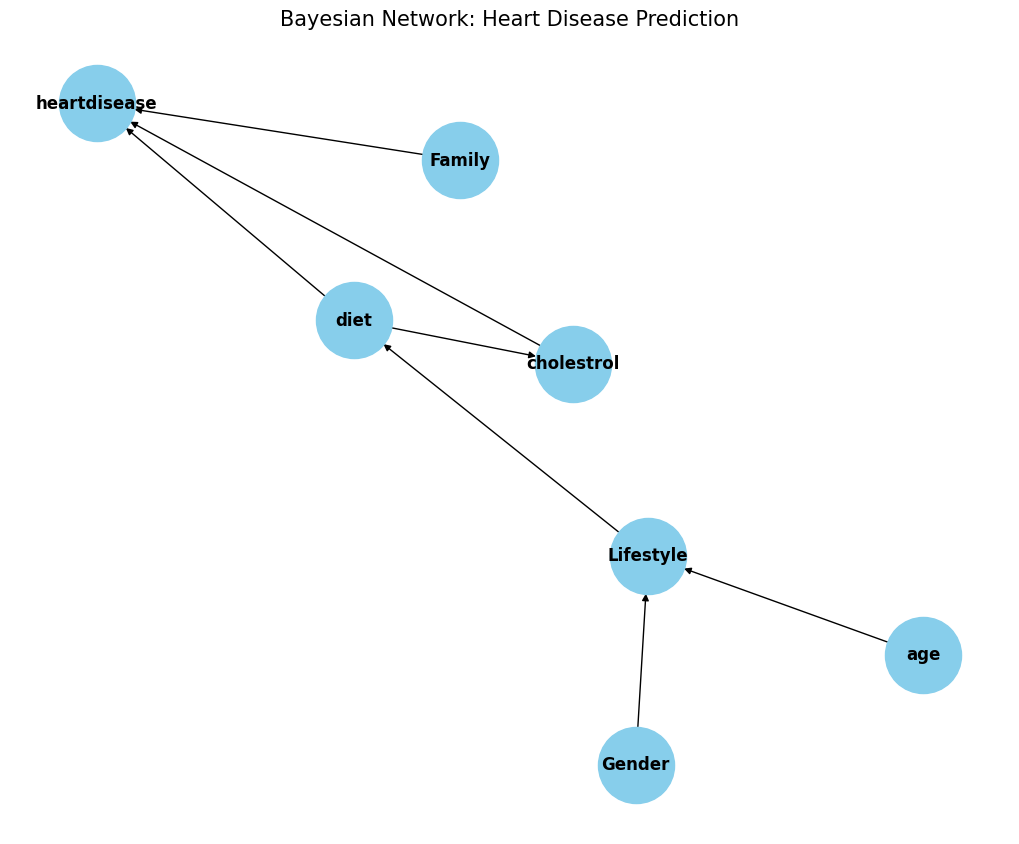

In [ ]:
!pip install networkx
import networkx as nx
from pgmpy.models import BayesianNetwork
import matplotlib.pyplot as plt

# ... (Your existing code for creating and training the model) ...

# Step 11: Visualize the Bayesian Network as a Directed Graph
# Instead of using to_networkx, manually create the NetworkX graph

# Get the edges from the Bayesian Network
edges = model.edges()

# Create a NetworkX DiGraph (directed graph)
nx_model = nx.DiGraph()
nx_model.add_edges_from(edges)

# Plot the directed graph
plt.figure(figsize=(10, 8))  # Adjust the size for better visualization
pos = nx.spring_layout(nx_model, seed=42)  # Using spring layout for better positioning

# Draw the nodes and edges
nx.draw(nx_model, pos, with_labels=True, node_size=3000,
        node_color='skyblue', font_size=12, font_weight='bold', arrows=True)

# Show the plot
plt.title("Bayesian Network: Heart Disease Prediction", fontsize=15)
plt.show()